Importing

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])


In [3]:
x_mean = np.mean(x)
y_mean = np.mean(y)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * x_mean

In [4]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [5]:
y_pred_analytic = beta_0 + beta_1 * x
y_pred_gradient = model.predict(x.reshape(-1, 1))

In [6]:
sse_analytic = np.sum((y - y_pred_analytic) ** 2)
sse_gradient = mean_squared_error(y, y_pred_gradient) * len(y)

In [8]:
sst = np.sum((y - np.mean(y)) ** 2)
r2_analytic = 1 - (sse_analytic / sst)
r2_gradient = r2_score(y, y_pred_gradient)

In [9]:
print("Analytic Formulation:")
print("Intercept:", beta_0)
print("Slope:", beta_1)
print("SSE:", sse_analytic)
print("R-Squared:", r2_analytic)

Analytic Formulation:
Intercept: 1.2363636363636363
Slope: 1.1696969696969697
SSE: 5.624242424242423
R-Squared: 0.952538038613988


In [10]:
print("\nGradient Descent:")
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("SSE:", sse_gradient)
print("R-Squared:", r2_gradient)


Gradient Descent:
Intercept: 1.2363636363636363
Slope: 1.1696969696969697
SSE: 5.624242424242423
R-Squared: 0.952538038613988


In [12]:
print("SSR:", sst * r2_analytic)

SSR: 112.87575757575758


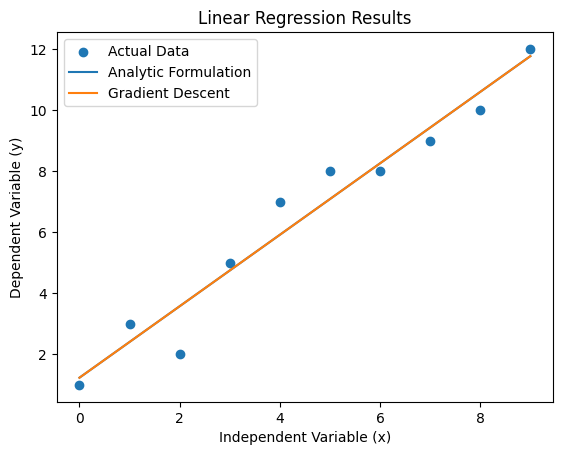

In [19]:
plt.scatter(x, y, label='Actual Data')
plt.plot(x, y_pred_analytic, label='Analytic Formulation')
plt.plot(x, y_pred_gradient, label='Gradient Descent')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Results')
plt.legend()
plt.show()